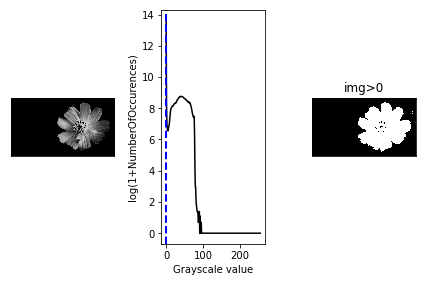

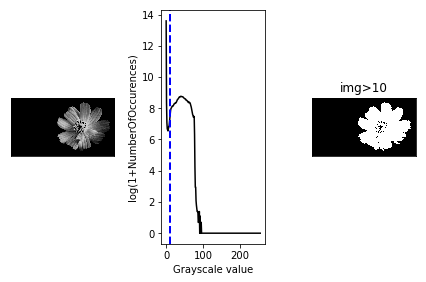

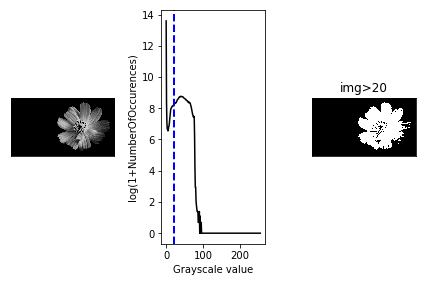

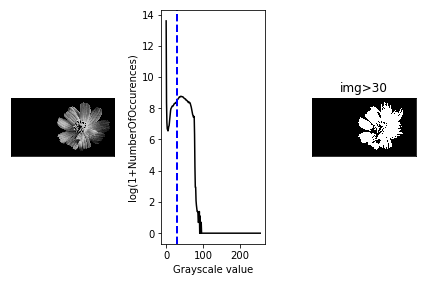

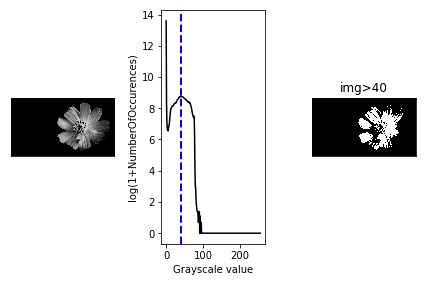

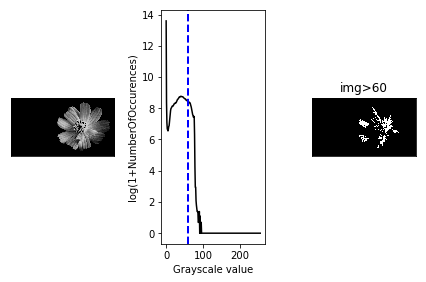

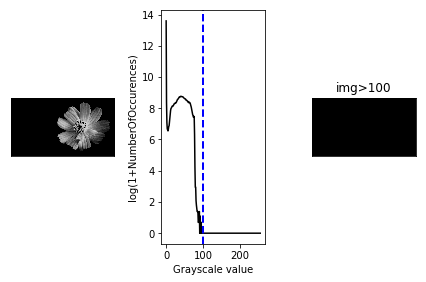

In [2]:
# Import the cv2 library
# Older threshold documentation provides more details on parameters:
#  http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html 
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image in grayscale
# imread():
#  Second argument is a flag which specifies the way image should be read.
#  cv2.IMREAD_COLOR     : Loads a color image. Any transparency of image will be neglected. It is the default flag.
#  cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
#  cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel
src = cv2.imread('flower.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold it so it becomes binary
# If pixel value is greater than a threshold value, it is assigned one value (may be white), 
# else it is assigned another value (may be black). The function used is cv2.threshold. 
#   First argument is the source image, which should be a grayscale image. 
#   Second argument is the threshold value which is used to classify the pixel values. 
#   Third argument is the maxVal which represents the value to be given if pixel value is more than 
#      (sometimes less than) the threshold value.
# OpenCV provides different styles of thresholding and it is decided by the 
#   fourth parameter of the function. Different types are:
#     cv2.THRESH_BINARY
#     cv2.THRESH_BINARY_INV
#     cv2.THRESH_TRUNC
#     cv2.THRESH_TOZERO
#     cv2.THRESH_TOZERO_INV
# See http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html
maxValue    = 255
threshRange = [0, 10, 20, 30, 40, 60, 100]
for threshValue in threshRange:    
    # Plot the input:
    plt.subplot(1,3,1)
    plt.xticks([]),plt.yticks([]) # Turn off the x and y coordinates
    plt.imshow(src, cmap='gray')
    
    # Plot the histogram:
    plt.subplot(1,3,2)
    mask   = None
    minVal = 0
    maxVal = 256
    NumOfBins = 256
    dim = 0          # Grayscale
    hist_full = cv2.calcHist([src], [dim], mask, [NumOfBins], [minVal, maxVal])
    plt.plot(np.log(hist_full+1), color='black')
    plt.axvline(threshValue, color='b', linestyle='dashed', linewidth=2)
    plt.xlabel("Grayscale value")
    plt.ylabel("log(1+NumberOfOccurences)")
    
    # Plot the output:
    plt.subplot(1,3,3) 
    plt.xticks([]),plt.yticks([]) # Turn off the x and y coordinates
    ret, threshImg = cv2.threshold(src, threshValue, maxValue, cv2.THRESH_BINARY)
    plt.imshow(threshImg, cmap='gray')
    plt.title("img>"+str(threshValue))
    
    # Put out the subimages.
    # w_pad for width. 
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()



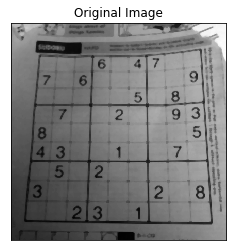

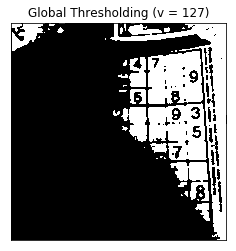

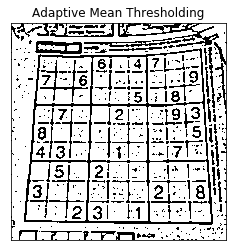

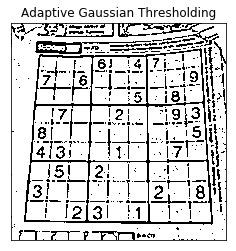

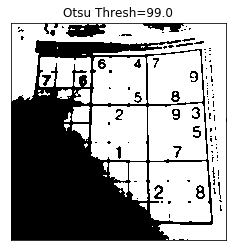

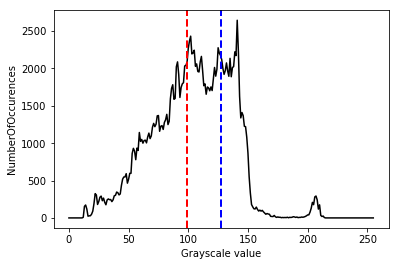

In [3]:
# Adaptive Threshold Examples
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in grayscale with uneven illumination:
img = cv2.imread('sudoku-original.jpg',0)

# Apply 5x5 window median filtering to clear the image:
img = cv2.medianBlur(img,5)

# Global threshold where the same value is applied everywhere:
globalThresh = 127
ret,th1 = cv2.threshold(img, globalThresh, 255, cv2.THRESH_BINARY)

# cv2.ADAPTIVE_THRESH_MEAN_C :
#  1. Scan the image from the upper-left pixel to the lower-right pixel.
#  2. Over each window, compute the mean.
#  3. For each pixel:
#       If the pixel >= mean-offset 
#        then set it to 1 
#        else set it to 0.
SquareWindowSize = 11 # Must be an odd number.
SubtractFromMean = 2  
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY, SquareWindowSize, SubtractFromMean)

# cv2.ADAPTIVE_THRESH_GAUSSIAN_C:
#  1. Scan the image from the upper-left pixel to the lower-right pixel.
#  2. Over each window, multiply by Gaussian Kernel with sigma given below.
#  3. For each pixel:
#       If the pixel >= Gaussian_output - offset 
#        then set it to 1 
#        else set it to 0.
# For how to setup the sigma, use:
#     sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8
# where ksize is the size of the local window.
# For documentation, see:
# http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#Mat getGaussianKernel(int ksize, double sigma, int ktype)
th3 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY, SquareWindowSize, SubtractFromMean)

# cv2.THRESH_BINARY+cv2.THRESH_OTSU:
# This approach finds a global threshold based on the idea of
# finding a threshold that maximizes the separation between two classes.
# The underlying code is given in:
#  http://docs.opencv.org/3.2.0/d7/d4d/tutorial_py_thresholding.html
otsuThresh, otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding',
          "Otsu Thresh="+str(otsuThresh)]
images = [img, th1, th2, th3, otsu]
for i in range(5):    
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.show()
    
# Plot the histogram and the thresholds: 
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist_full, color='black')
plt.axvline(globalThresh, color='b', linestyle='dashed', linewidth=2)
plt.axvline(otsuThresh, color='r', linestyle='dashed', linewidth=2)
plt.xlabel("Grayscale value")
plt.ylabel("NumberOfOccurences")
plt.show()

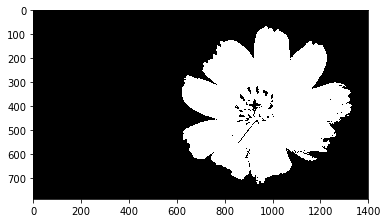

Component =  0
Min Col =  0
Min Row =  0
Bounding box Width  =  1400
Bounding box Height =  788
Area =  811628


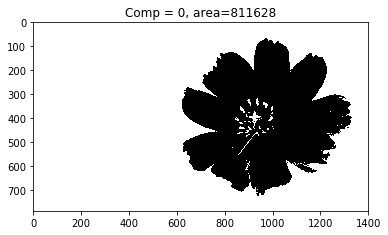


Component =  1
Min Col =  622
Min Row =  64
Bounding box Width  =  713
Bounding box Height =  663
Area =  291486


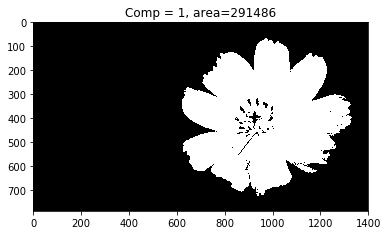


Component =  2
Min Col =  1282
Min Row =  312
Bounding box Width  =  1
Bounding box Height =  1
Area =  1

Component =  3
Min Col =  1299
Min Row =  322
Bounding box Width  =  2
Bounding box Height =  1
Area =  2

Component =  4
Min Col =  868
Min Row =  353
Bounding box Width  =  1
Bounding box Height =  1
Area =  1

Component =  5
Min Col =  924
Min Row =  383
Bounding box Width  =  4
Bounding box Height =  2
Area =  6

Component =  6
Min Col =  1317
Min Row =  387
Bounding box Width  =  1
Bounding box Height =  1
Area =  1

Component =  7
Min Col =  1311
Min Row =  388
Bounding box Width  =  1
Bounding box Height =  1
Area =  1

Component =  8
Min Col =  912
Min Row =  395
Bounding box Width  =  2
Bounding box Height =  2
Area =  3

Component =  9
Min Col =  924
Min Row =  413
Bounding box Width  =  3
Bounding box Height =  3
Area =  6

Component =  10
Min Col =  1322
Min Row =  429
Bounding box Width  =  2
Bounding box Height =  1
Area =  2

Component =  11
Min Col =  1322
Min Row

In [7]:
# Connected Component Analysis Example:
# https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connected-components-with-stats-in-python
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image in grayscale
# imread():
#  Second argument is a flag which specifies the way image should be read.
#  cv2.IMREAD_COLOR     : Loads a color image. Any transparency of image will be neglected. It is the default flag.
#  cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
#  cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel
src = cv2.imread('flower.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold the image
maxValue    = 255
threshValue = 10
ret, threshImg = cv2.threshold(src, threshValue, maxValue, cv2.THRESH_BINARY)

# You need to choose 4 or 8 for connectivity type
# 4-point connectivity:
#      1
#    2 x 3
#      4
connectivity = 4  # 8 for all pixels covered

# OpenCV data types:
# https://stackoverflow.com/questions/15245262/opencv-mat-element-types-and-their-sizes
#  0  8-bit unsigned integer (uchar) 
#  1  8-bit signed integer (schar)
#  2  16-bit unsigned integer (ushort)
#  3  16-bit signed integer (short)
#  4  32-bit signed integer (int)
#  5  32-bit floating-point number (float)
#  6  64-bit floating-point number (double)
# For these basic types, the following enumeration is applied:
#  enum { CV_8U=0, CV_8S=1, CV_16U=2, CV_16S=3, CV_32S=4, CV_32F=5, CV_64F=6 };

ccaOut = cv2.connectedComponentsWithStats(threshImg, connectivity, cv2.CV_32S)

# Get the results
# The first cell is the number of labels
num_labels = ccaOut[0]
label_img  = ccaOut[1]
stats      = ccaOut[2]
centroids  = ccaOut[3]

plt.imshow(threshImg, cmap='gray'), plt.show()


# Statistics output for each label, including the background label, see below for available statistics. 
# Statistics are accessed via stats[label, COLUMN] where available columns are defined below.
#  cv2.CC_STAT_LEFT The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
#  cv2.CC_STAT_TOP The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
#  cv2.CC_STAT_WIDTH The horizontal size of the bounding box
#  cv2.CC_STAT_HEIGHT The vertical size of the bounding box
#  cv2.CC_STAT_AREA The total area (in pixels) of the connected component
for comp in range(0, num_labels):
    print("Component = ", comp)
    print("Min Col = ", stats[comp, cv2.CC_STAT_LEFT])
    print("Min Row = ", stats[comp, cv2.CC_STAT_TOP])
    print("Bounding box Width  = ", stats[comp, cv2.CC_STAT_WIDTH])
    print("Bounding box Height = ", stats[comp, cv2.CC_STAT_HEIGHT])
    print("Area = ", stats[comp, cv2.CC_STAT_AREA])
    area = stats[comp, cv2.CC_STAT_AREA]
    if (area > 100):
        plt.imshow(label_img==comp, cmap='gray') 
        plt.title("Comp = "+str(comp)+", area="+str(area)) 
        plt.show()
    print("")
